In [1]:
from PIL import Image

In [2]:
pm_2016 = Image.open('PM2.5_Images/2016.tif')

In [3]:
pm_2016.show()

In [4]:
import matplotlib.pyplot as plt

display: unable to open X server `' @ error/display.c/DisplayImageCommand/431.


In [5]:
image = plt.imread('PM2.5_Images/2016.tif')

In [6]:
image

array([[[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       ...,

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        ...,
        [  0,   0,   0, 255],
        [  0,   0,   0, 255],
        [  0,   0,   0, 255]],

       [[  0

In [7]:
image.shape

(2891, 4355, 4)

In [8]:
image[0][0]

array([  0,   0,   0, 255], dtype=uint8)

In [9]:
import georasters as gr

ERROR 1: PROJ: proj_create_from_database: Open of /global/homes/w/wenhuan/.conda/envs/myenv/share/proj failed
PROJ: proj_create_from_database: SQLite error on SELECT name, type, coordinate_system_auth_name, coordinate_system_code, datum_auth_name, datum_code, area_of_use_auth_name, area_of_use_code, text_definition, deprecated FROM geodetic_crs WHERE auth_name = ? AND code = ?: no such column: area_of_use_auth_name
/global/homes/w/wenhuan/.conda/envs/myenv/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.8.0-CAPI-1.13.1 ) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


## check year 2016

In [10]:
pm_2016 = gr.from_file('PM2.5_Images/2016.tif')

<AxesSubplot:>

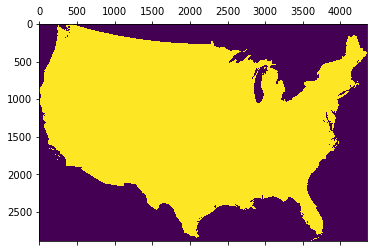

In [11]:
pm_2016.plot()

In [12]:
from osgeo import gdal
rds = gdal.Open("PM2.5_Images/2016.tif")

In [91]:
ndv, xsize, ysize, geot, projection, datatype = gr.get_geo_info('PM2.5_Images/2016.tif')

In [95]:
ndv, xsize, ysize, geot, projection, datatype

(None,
 4355,
 2891,
 (0.0, 1.0, 0.0, 0.0, 0.0, 1.0),
 <osgeo.osr.SpatialReference; proxy of <Swig Object of type 'OSRSpatialReferenceShadow *' at 0x15551ae6ea80> >,
 'Float32')

In [94]:
row, col = gr.map_pixel(0,0,geot[1],geot[-1], geot[0],geot[3])
row, col

(0, 0)

In [13]:
rds.GetDescription()

'PM2.5_Images/2016.tif'

In [14]:
pm_2016 = pm_2016.to_pandas()

In [15]:
pm_2016.head()

,row,col,value,x,y
0,0,0,-3.400000e+38,0.0,0.0
1,0,1,-3.400000e+38,1.0,0.0
2,0,2,-3.400000e+38,2.0,0.0
3,0,3,-3.400000e+38,3.0,0.0
4,0,4,-3.400000e+38,4.0,0.0


In [16]:
pm_2016['value'].unique()

array([-3.4000000e+38,  1.9042356e+00,  1.7644416e+00, ...,
        7.0473566e+00,  6.8868265e+00,  6.9012785e+00], dtype=float32)

In [17]:
pm_2016.shape

(12590305, 5)

In [18]:
len(pm_2016['value'].unique().tolist())

6112389

## Check Year 2015

In [19]:
from libtiff import TIFF

tif = TIFF.open('PM2.5_Images/2015.tif') # open tiff file in read mode
# read an image in the current TIFF directory as a numpy array
image = tif.read_image()

# read all images in a TIFF file:
for image in tif.iter_images(): 
    pass

tif = TIFF.open('PM2.5_Images/2015_new.tif', mode='w')
tif.write_image(image)

In [20]:
import georasters as gr

In [21]:
pm_2015 = gr.from_file('PM2.5_Images/2015_new.tif')

<AxesSubplot:>

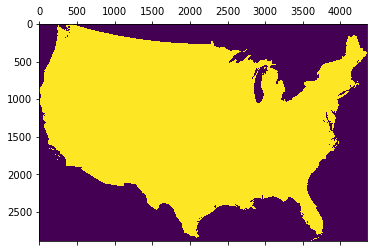

In [22]:
pm_2015.plot()

In [23]:
pm_2015 = pm_2015.to_pandas()

In [24]:
pm_2015.head()

,row,col,value,x,y
0,0,0,-3.400000e+38,0.0,0.0
1,0,1,-3.400000e+38,1.0,0.0
2,0,2,-3.400000e+38,2.0,0.0
3,0,3,-3.400000e+38,3.0,0.0
4,0,4,-3.400000e+38,4.0,0.0


In [25]:
pm_2015['value'].unique()

array([-3.4000000e+38,  3.1552072e+00,  1.6429625e+00, ...,
        1.8782512e+00,  5.4711609e+00,  5.4445181e+00], dtype=float32)

In [26]:
pm_2015.shape

(12590305, 5)

In [27]:
import numpy as np
import math

In [28]:
lat = 90
np.pi

3.141592653589793

In [29]:
np.cos((45/180)*np.pi)

0.7071067811865476

### Bounding information
#### Bounding Coordinates:
#### West Bounding Coordinate: -180.000000
#### East Bounding Coordinate: -65.000000
#### North Bounding Coordinate: 72.000000
#### South Bounding Coordinate: 17.000000

### The conversion between latitude/longitude and distance
#### he approximate conversions are:
#### Latitude: 1 deg = 110.574 km
#### Longitude: 1 deg = 111.320*cos(latitude) km - latitude should be radian first

In [30]:
degree_lat = 1/110.574
degree_lat

0.009043717329571148

In [31]:
lat_origin = (72/180)* np.pi

In [32]:
degree_lon = 1/(111.320*np.cos(lat_origin))

In [33]:
degree_lon

0.029069960272186394

In [34]:
pm_2016.head()

,row,col,value,x,y
0,0,0,-3.400000e+38,0.0,0.0
1,0,1,-3.400000e+38,1.0,0.0
2,0,2,-3.400000e+38,2.0,0.0
3,0,3,-3.400000e+38,3.0,0.0
4,0,4,-3.400000e+38,4.0,0.0


In [35]:
pm_2016.tail()

,row,col,value,x,y
12590300,2890,4350,-3.400000e+38,4350.0,2890.0
12590301,2890,4351,-3.400000e+38,4351.0,2890.0
12590302,2890,4352,-3.400000e+38,4352.0,2890.0
12590303,2890,4353,-3.400000e+38,4353.0,2890.0
12590304,2890,4354,-3.400000e+38,4354.0,2890.0


In [36]:
pm_2016.describe()

,row,col,value,x,y
count,1.259030e+07,1.259030e+07,1.259030e+07,1.259030e+07,1.259030e+07
mean,1.445000e+03,2.177000e+03,-inf,2.177000e+03,1.445000e+03
std,8.345598e+02,1.257180e+03,inf,1.257180e+03,8.345598e+02
min,0.000000e+00,0.000000e+00,-3.400000e+38,0.000000e+00,0.000000e+00
25%,7.220000e+02,1.088000e+03,-3.400000e+38,1.088000e+03,7.220000e+02
50%,1.445000e+03,2.177000e+03,2.666855e+00,2.177000e+03,1.445000e+03
75%,2.168000e+03,3.266000e+03,5.865504e+00,3.266000e+03,2.168000e+03
max,2.890000e+03,4.354000e+03,2.946662e+01,4.354000e+03,2.890000e+03


### I guess the coordinate of origin is (-125, 49)

In [37]:
def findCoordinate(lon_x, lat_y):
    point = []
    degree_lat = 1/110.574
    lat = 49 - lat_y*degree_lat
    lat_radian = (lat/180)*np.pi
    degree_lon = 1/(111.320*np.cos(lat_radian))
    lon = -125 + (lon_x * degree_lon)
    point.append(lat)
    point.append(lon)
    return point

In [38]:
pm_2016['coordinate'] = pm_2016.apply(lambda x: findCoordinate(x['x'], x['y']), axis=1)

In [39]:
pm_2016.head()

,row,col,value,x,y,coordinate
0,0,0,-3.400000e+38,0.0,0.0,"[49.0, -125.0]"
1,0,1,-3.400000e+38,1.0,0.0,"[49.0, -124.98630746418698]"
2,0,2,-3.400000e+38,2.0,0.0,"[49.0, -124.97261492837396]"
3,0,3,-3.400000e+38,3.0,0.0,"[49.0, -124.95892239256092]"
4,0,4,-3.400000e+38,4.0,0.0,"[49.0, -124.9452298567479]"


#### make the grid be 100km*100km

In [40]:
pm_16 = pm_2016[pm_2016.index % 100 == 0]

In [41]:
pm_16.head()

,row,col,value,x,y,coordinate
0,0,0,-3.400000e+38,0.0,0.0,"[49.0, -125.0]"
100,0,100,-3.400000e+38,100.0,0.0,"[49.0, -123.63074641869761]"
200,0,200,-3.400000e+38,200.0,0.0,"[49.0, -122.26149283739524]"
300,0,300,-3.400000e+38,300.0,0.0,"[49.0, -120.89223925609285]"
400,0,400,-3.400000e+38,400.0,0.0,"[49.0, -119.52298567479046]"


In [42]:
pm_16 = pm_16.reset_index()
pm_16.head()

,index,row,col,value,x,y,coordinate
0,0,0,0,-3.400000e+38,0.0,0.0,"[49.0, -125.0]"
1,100,0,100,-3.400000e+38,100.0,0.0,"[49.0, -123.63074641869761]"
2,200,0,200,-3.400000e+38,200.0,0.0,"[49.0, -122.26149283739524]"
3,300,0,300,-3.400000e+38,300.0,0.0,"[49.0, -120.89223925609285]"
4,400,0,400,-3.400000e+38,400.0,0.0,"[49.0, -119.52298567479046]"


In [43]:
def createID(index):
    index = int(index/100)
    strIndex = str(index).rjust(6, '0')
    return strIndex

In [44]:
pm_16['ID'] = pm_16['index'].apply(createID)

In [45]:
pm_16.head()

,index,row,col,value,x,y,coordinate,ID
0,0,0,0,-3.400000e+38,0.0,0.0,"[49.0, -125.0]",000000
1,100,0,100,-3.400000e+38,100.0,0.0,"[49.0, -123.63074641869761]",000001
2,200,0,200,-3.400000e+38,200.0,0.0,"[49.0, -122.26149283739524]",000002
3,300,0,300,-3.400000e+38,300.0,0.0,"[49.0, -120.89223925609285]",000003
4,400,0,400,-3.400000e+38,400.0,0.0,"[49.0, -119.52298567479046]",000004


In [46]:
pm_16.shape

(125904, 8)

In [47]:
def ID_Coordinate(ID, coordinate):
    setList = []
    setList.append(ID)
    setList.append(coordinate[0])
    setList.append(coordinate[1])
    return setList

In [48]:
pm_16['ID_Coordinate'] = pm_16.apply(lambda x: ID_Coordinate(x['ID'], x['coordinate']), axis=1)

In [49]:
pm_16.head()

,index,row,col,value,x,y,coordinate,ID,ID_Coordinate
0,0,0,0,-3.400000e+38,0.0,0.0,"[49.0, -125.0]",000000,"[000000, 49.0, -125.0]"
1,100,0,100,-3.400000e+38,100.0,0.0,"[49.0, -123.63074641869761]",000001,"[000001, 49.0, -123.63074641869761]"
2,200,0,200,-3.400000e+38,200.0,0.0,"[49.0, -122.26149283739524]",000002,"[000002, 49.0, -122.26149283739524]"
3,300,0,300,-3.400000e+38,300.0,0.0,"[49.0, -120.89223925609285]",000003,"[000003, 49.0, -120.89223925609285]"
4,400,0,400,-3.400000e+38,400.0,0.0,"[49.0, -119.52298567479046]",000004,"[000004, 49.0, -119.52298567479046]"


In [50]:
pm_16 = pm_16.rename(columns = {'value': 'PM2.5'})

In [52]:
pm_16.head()

,index,row,col,PM2.5,x,y,coordinate,ID,ID_Coordinate
0,0,0,0,-3.400000e+38,0.0,0.0,"[49.0, -125.0]",000000,"[000000, 49.0, -125.0]"
1,100,0,100,-3.400000e+38,100.0,0.0,"[49.0, -123.63074641869761]",000001,"[000001, 49.0, -123.63074641869761]"
2,200,0,200,-3.400000e+38,200.0,0.0,"[49.0, -122.26149283739524]",000002,"[000002, 49.0, -122.26149283739524]"
3,300,0,300,-3.400000e+38,300.0,0.0,"[49.0, -120.89223925609285]",000003,"[000003, 49.0, -120.89223925609285]"
4,400,0,400,-3.400000e+38,400.0,0.0,"[49.0, -119.52298567479046]",000004,"[000004, 49.0, -119.52298567479046]"


### Assign the PM2.5 to the closest census tract

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dask.dataframe as ddf
from pandas import Series, DataFrame
%matplotlib inline

In [54]:
import seaborn as sn
import plotly.express as px

In [55]:
ur_files = ddf.read_csv('cb_2021_us_tract_500k.csv', dtype = {'STATEFP': str, 'COUNTYFP': str, 'TRACTCE': str, 'NAME': str, 'NAMELSAD': str})
census = ur_files.compute()
census.head()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,LSAD,ALAND,AWATER,geometry
0,13,163,960300,1400000US13163960300,13163960300,9603,Census Tract 9603,GA,Jefferson County,Georgia,CT,564728206,4845400,"POLYGON ((-82.661917 33.126331, -82.651937 33...."
1,37,109,071201,1400000US37109071201,37109071201,712.01,Census Tract 712.01,NC,Lincoln County,North Carolina,CT,5976613,6611763,"POLYGON ((-80.993444 35.478784, -80.9914239999..."
2,25,025,050200,1400000US25025050200,25025050200,502,Census Tract 502,MA,Suffolk County,Massachusetts,CT,243271,0,"POLYGON ((-71.040029 42.37865, -71.03921099999..."
3,17,031,230200,1400000US17031230200,17031230200,2302,Census Tract 2302,IL,Cook County,Illinois,CT,214283,0,"POLYGON ((-87.71341700000001 41.913589, -87.71..."
4,41,047,001607,1400000US41047001607,41047001607,16.07,Census Tract 16.07,OR,Marion County,Oregon,CT,1814790,0,"POLYGON ((-122.990318 44.968214, -122.987853 4..."


In [56]:
census['CENSUS_FIPS'] = census['STATEFP'] + census['COUNTYFP'] + census['TRACTCE']
census.head()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,LSAD,ALAND,AWATER,geometry,CENSUS_FIPS
0,13,163,960300,1400000US13163960300,13163960300,9603,Census Tract 9603,GA,Jefferson County,Georgia,CT,564728206,4845400,"POLYGON ((-82.661917 33.126331, -82.651937 33....",13163960300
1,37,109,071201,1400000US37109071201,37109071201,712.01,Census Tract 712.01,NC,Lincoln County,North Carolina,CT,5976613,6611763,"POLYGON ((-80.993444 35.478784, -80.9914239999...",37109071201
2,25,025,050200,1400000US25025050200,25025050200,502,Census Tract 502,MA,Suffolk County,Massachusetts,CT,243271,0,"POLYGON ((-71.040029 42.37865, -71.03921099999...",25025050200
3,17,031,230200,1400000US17031230200,17031230200,2302,Census Tract 2302,IL,Cook County,Illinois,CT,214283,0,"POLYGON ((-87.71341700000001 41.913589, -87.71...",17031230200
4,41,047,001607,1400000US41047001607,41047001607,16.07,Census Tract 16.07,OR,Marion County,Oregon,CT,1814790,0,"POLYGON ((-122.990318 44.968214, -122.987853 4...",41047001607


In [57]:
from shapely import wkt

In [58]:
def findCentroid(g):
    p1 = wkt.loads(g)
    return p1.centroid.wkt

In [59]:
census['Centroid'] = census['geometry'].apply(findCentroid)

In [60]:
census.head()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,LSAD,ALAND,AWATER,geometry,CENSUS_FIPS,Centroid
0,13,163,960300,1400000US13163960300,13163960300,9603,Census Tract 9603,GA,Jefferson County,Georgia,CT,564728206,4845400,"POLYGON ((-82.661917 33.126331, -82.651937 33....",13163960300,POINT (-82.42777455266631 33.02009497835021)
1,37,109,071201,1400000US37109071201,37109071201,712.01,Census Tract 712.01,NC,Lincoln County,North Carolina,CT,5976613,6611763,"POLYGON ((-80.993444 35.478784, -80.9914239999...",37109071201,POINT (-80.9680558426884 35.45990205837115)
2,25,025,050200,1400000US25025050200,25025050200,502,Census Tract 502,MA,Suffolk County,Massachusetts,CT,243271,0,"POLYGON ((-71.040029 42.37865, -71.03921099999...",25025050200,POINT (-71.03573713399868 42.37754679162973)
3,17,031,230200,1400000US17031230200,17031230200,2302,Census Tract 2302,IL,Cook County,Illinois,CT,214283,0,"POLYGON ((-87.71341700000001 41.913589, -87.71...",17031230200,POINT (-87.71008151357118 41.91187356531011)
4,41,047,001607,1400000US41047001607,41047001607,16.07,Census Tract 16.07,OR,Marion County,Oregon,CT,1814790,0,"POLYGON ((-122.990318 44.968214, -122.987853 4...",41047001607,POINT (-122.9834298654585 44.96158272247879)


In [61]:
coordinateList = census['Centroid'].tolist()

In [62]:
def findLon(point):
    strList = point.split(' ')
    lon = strList[1][1:]
    lon = float(lon)
    return lon

In [63]:
def findLat(point):
    strList = point.split(' ')
    lat = strList[2][:-1]
    lat = float(lat)
    return lat

In [64]:
census['lat'] = census['Centroid'].apply(findLat)
census['lon'] = census['Centroid'].apply(findLon)

In [65]:
census.head()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,LSAD,ALAND,AWATER,geometry,CENSUS_FIPS,Centroid,lat,lon
0,13,163,960300,1400000US13163960300,13163960300,9603,Census Tract 9603,GA,Jefferson County,Georgia,CT,564728206,4845400,"POLYGON ((-82.661917 33.126331, -82.651937 33....",13163960300,POINT (-82.42777455266631 33.02009497835021),33.020095,-82.427775
1,37,109,071201,1400000US37109071201,37109071201,712.01,Census Tract 712.01,NC,Lincoln County,North Carolina,CT,5976613,6611763,"POLYGON ((-80.993444 35.478784, -80.9914239999...",37109071201,POINT (-80.9680558426884 35.45990205837115),35.459902,-80.968056
2,25,025,050200,1400000US25025050200,25025050200,502,Census Tract 502,MA,Suffolk County,Massachusetts,CT,243271,0,"POLYGON ((-71.040029 42.37865, -71.03921099999...",25025050200,POINT (-71.03573713399868 42.37754679162973),42.377547,-71.035737
3,17,031,230200,1400000US17031230200,17031230200,2302,Census Tract 2302,IL,Cook County,Illinois,CT,214283,0,"POLYGON ((-87.71341700000001 41.913589, -87.71...",17031230200,POINT (-87.71008151357118 41.91187356531011),41.911874,-87.710082
4,41,047,001607,1400000US41047001607,41047001607,16.07,Census Tract 16.07,OR,Marion County,Oregon,CT,1814790,0,"POLYGON ((-122.990318 44.968214, -122.987853 4...",41047001607,POINT (-122.9834298654585 44.96158272247879),44.961583,-122.983430


In [66]:
pm_16.head()

,index,row,col,PM2.5,x,y,coordinate,ID,ID_Coordinate
0,0,0,0,-3.400000e+38,0.0,0.0,"[49.0, -125.0]",000000,"[000000, 49.0, -125.0]"
1,100,0,100,-3.400000e+38,100.0,0.0,"[49.0, -123.63074641869761]",000001,"[000001, 49.0, -123.63074641869761]"
2,200,0,200,-3.400000e+38,200.0,0.0,"[49.0, -122.26149283739524]",000002,"[000002, 49.0, -122.26149283739524]"
3,300,0,300,-3.400000e+38,300.0,0.0,"[49.0, -120.89223925609285]",000003,"[000003, 49.0, -120.89223925609285]"
4,400,0,400,-3.400000e+38,400.0,0.0,"[49.0, -119.52298567479046]",000004,"[000004, 49.0, -119.52298567479046]"


In [67]:
pm_16.tail()

,index,row,col,PM2.5,x,y,coordinate,ID,ID_Coordinate
125899,12589900,2890,3950,-3.400000e+38,3950.0,2890.0,"[22.863656917539384, -86.49114669848854]",125899,"[125899, 22.863656917539384, -86.49114669848854]"
125900,12590000,2890,4050,-3.400000e+38,4050.0,2890.0,"[22.863656917539384, -85.51623901996926]",125900,"[125900, 22.863656917539384, -85.51623901996926]"
125901,12590100,2890,4150,-3.400000e+38,4150.0,2890.0,"[22.863656917539384, -84.54133134144999]",125901,"[125901, 22.863656917539384, -84.54133134144999]"
125902,12590200,2890,4250,-3.400000e+38,4250.0,2890.0,"[22.863656917539384, -83.5664236629307]",125902,"[125902, 22.863656917539384, -83.5664236629307]"
125903,12590300,2890,4350,-3.400000e+38,4350.0,2890.0,"[22.863656917539384, -82.59151598441143]",125903,"[125903, 22.863656917539384, -82.59151598441143]"


In [68]:
def dist(p0, p1):
    return (((p0[0] - p1[0])**2) + ((p0[1] - p1[1])**2))**.5

In [69]:
pointList = pm_16['ID_Coordinate'].tolist()

In [70]:
len(pointList)

125904

In [71]:
pointList[-1]

['125903', 22.863656917539384, -82.59151598441143]

### Find a small square with each side 200km and the center is the census tract's center

In [72]:
def findSquare(lat, lon):
    square = []
    top = lat + 0.5
    down = lat - 0.5
    right = lon + 0.5
    left = lon - 0.5
    square.append(top)
    square.append(down)
    square.append(left)
    square.append(right)
    return square

In [74]:
square1 = findSquare(44,-88)
square1

[44.5, 43.5, -88.5, -87.5]

In [75]:
def findPoints(lat, lon):
    square = findSquare(lat, lon)
    top = square[0]
    down = square[1]
    left = square[2]
    right = square[3]
    points = []
    for point in pointList:
        p_lat = point[1]
        p_lon = point[2]
        if point[1] <= top and point[1] >= down and point[2] >= left and point[2] <= right:
            points.append(point)
            
    return points

In [76]:
points = findPoints(42, -88)

In [77]:
points

[['031343', 42.49756724003834, -87.77881151607451],
 ['031386', 42.488523522708775, -88.4541996832096],
 ['031430', 42.4794798053792, -87.91137441508671],
 ['031517', 42.46139237072006, -88.04385700274773],
 ['031561', 42.45234865339049, -87.50132346466455],
 ['031604', 42.44330493606092, -88.1762593871764],
 ['031648', 42.43426121873135, -87.63386150607712],
 ['031691', 42.425217501401775, -88.30858167633446],
 ['031735', 42.41617378407221, -87.7663193441127],
 ['031778', 42.40713006674263, -88.44082397802667],
 ['031822', 42.39808634941306, -87.89869708667294],
 ['031909', 42.37999891475392, -88.0309948415028],
 ['031996', 42.361911480094776, -88.16321271619083],
 ['032040', 42.35286776276521, -87.62151143011098],
 ['032083', 42.34382404543564, -88.29535081816952],
 ['032127', 42.33478032810606, -87.75378451508581],
 ['032170', 42.325736610776495, -88.42740925471557],
 ['032214', 42.31669289344692, -87.88597782713967],
 ['032301', 42.298605458787776, -88.01809147348979],
 ['032388', 

In [78]:
def shortestDistance(lat, lon):
    points = findPoints(lat, lon)
            
    distants = []
    p1 = []
    p1.append(lat)
    p1.append(lon)
    for point in points:
        p_id = point[0]
        p_lat = point[1]
        p_lon = point[2]
        p2 = []
        p2.append(p_lat)
        p2.append(p_lon)
        distant = dist(p1, p2)
        dist_id = []
        dist_id.append(p_id)
        dist_id.append(distant)
        distants.append(dist_id)
    distantList = []    
    for ele in distants:
        distantList.append(ele[1])
    for item in distants:
        if item[1] == min(distantList):
            return item[0]

In [79]:
result1 = shortestDistance(33,-88)
result1

'077118'

In [80]:
result2 = shortestDistance(42.377547,-80.035737)
result2

'031872'

In [81]:
pointList[0]

['000000', 49.0, -125.0]

In [96]:
census['NearestPoint'] = census.apply(lambda x: shortestDistance(x['lat'], x['lon']), axis =1)

In [97]:
census.head()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,LSAD,ALAND,AWATER,geometry,CENSUS_FIPS,Centroid,lat,lon,NearestPoint
0,13,163,960300,1400000US13163960300,13163960300,9603,Census Tract 9603,GA,Jefferson County,Georgia,CT,564728206,4845400,"POLYGON ((-82.661917 33.126331, -82.651937 33....",13163960300,POINT (-82.42777455266631 33.02009497835021),33.020095,-82.427775,076949
1,37,109,071201,1400000US37109071201,37109071201,712.01,Census Tract 712.01,NC,Lincoln County,North Carolina,CT,5976613,6611763,"POLYGON ((-80.993444 35.478784, -80.9914239999...",37109071201,POINT (-80.9680558426884 35.45990205837115),35.459902,-80.968056,065452
2,25,025,050200,1400000US25025050200,25025050200,502,Census Tract 502,MA,Suffolk County,Massachusetts,CT,243271,0,"POLYGON ((-71.040029 42.37865, -71.03921099999...",25025050200,POINT (-71.03573713399868 42.37754679162973),42.377547,-71.035737,None
3,17,031,230200,1400000US17031230200,17031230200,2302,Census Tract 2302,IL,Cook County,Illinois,CT,214283,0,"POLYGON ((-87.71341700000001 41.913589, -87.71...",17031230200,POINT (-87.71008151357118 41.91187356531011),41.911874,-87.710082,034087
4,41,047,001607,1400000US41047001607,41047001607,16.07,Census Tract 16.07,OR,Marion County,Oregon,CT,1814790,0,"POLYGON ((-122.990318 44.968214, -122.987853 4...",41047001607,POINT (-122.9834298654585 44.96158272247879),44.961583,-122.983430,019512


In [98]:
census = census.rename(columns = {'NearestPoint': 'ID'})

In [99]:
census = census.merge(pm_16[['ID', 'PM2.5']], on = 'ID', how = 'left')

In [100]:
census.head()

,STATEFP,COUNTYFP,TRACTCE,AFFGEOID,GEOID,NAME,NAMELSAD,STUSPS,NAMELSADCO,STATE_NAME,LSAD,ALAND,AWATER,geometry,CENSUS_FIPS,Centroid,lat,lon,ID,PM2.5
0,13,163,960300,1400000US13163960300,13163960300,9603,Census Tract 9603,GA,Jefferson County,Georgia,CT,564728206,4845400,"POLYGON ((-82.661917 33.126331, -82.651937 33....",13163960300,POINT (-82.42777455266631 33.02009497835021),33.020095,-82.427775,076949,-3.400000e+38
1,37,109,071201,1400000US37109071201,37109071201,712.01,Census Tract 712.01,NC,Lincoln County,North Carolina,CT,5976613,6611763,"POLYGON ((-80.993444 35.478784, -80.9914239999...",37109071201,POINT (-80.9680558426884 35.45990205837115),35.459902,-80.968056,065452,-3.400000e+38
2,25,025,050200,1400000US25025050200,25025050200,502,Census Tract 502,MA,Suffolk County,Massachusetts,CT,243271,0,"POLYGON ((-71.040029 42.37865, -71.03921099999...",25025050200,POINT (-71.03573713399868 42.37754679162973),42.377547,-71.035737,None,NaN
3,17,031,230200,1400000US17031230200,17031230200,2302,Census Tract 2302,IL,Cook County,Illinois,CT,214283,0,"POLYGON ((-87.71341700000001 41.913589, -87.71...",17031230200,POINT (-87.71008151357118 41.91187356531011),41.911874,-87.710082,034087,5.922972e+00
4,41,047,001607,1400000US41047001607,41047001607,16.07,Census Tract 16.07,OR,Marion County,Oregon,CT,1814790,0,"POLYGON ((-122.990318 44.968214, -122.987853 4...",41047001607,POINT (-122.9834298654585 44.96158272247879),44.961583,-122.983430,019512,-3.400000e+38


In [101]:
census['PM2.5'].isna().sum()

4622

In [102]:
census.shape

(85230, 20)

In [104]:
valid = 85230-4622
valid

80608

### So there are 80608 census tracts that have PM2.5 data in 2016

In [105]:
pm_16.describe()

,index,row,col,PM2.5,x,y
count,1.259040e+05,125904.00000,125904.000000,1.259040e+05,125904.000000,125904.00000
mean,6.295150e+06,1445.00000,2175.000000,-inf,2175.000000,1445.00000
std,3.634550e+06,834.56938,1257.193885,inf,1257.193885,834.56938
min,0.000000e+00,0.00000,0.000000,-3.400000e+38,0.000000,0.00000
25%,3.147575e+06,722.00000,1085.000000,-3.400000e+38,1085.000000,722.00000
50%,6.295150e+06,1445.00000,2175.000000,2.667460e+00,2175.000000,1445.00000
75%,9.442725e+06,2168.00000,3265.000000,5.856285e+00,3265.000000,2168.00000
max,1.259030e+07,2890.00000,4350.000000,1.984056e+01,4350.000000,2890.00000


In [106]:
list1 = list(pm_16['PM2.5'].unique())

In [107]:
for element in list1:
    if element <= 0:
        print(element)

-3.4e+38


### So I guess that they use this negative number to represent null value, so let clear them

In [108]:
def clearNegative(value):
    if value < 0:
        return np.nan
    else:
        return value

In [109]:
census['PM2.5'] = census['PM2.5'].apply(clearNegative)

In [110]:
census['PM2.5'].isna().sum()

34727

In [111]:
pm_16['PM2.5'] = pm_16['PM2.5'].apply(clearNegative)

In [112]:
pm_16['PM2.5'].isna().sum()

51741

In [115]:
valid = 85230 - 34727
valid

50503

### After clear all the negative values, 50503 census tracts have PM2.5 data 